# Statistics

Every variable we observe in the data has a particular frequency distribution and in turn a probability distribution. These exact distribtions are unique to the variable under consideration. However, the shapes of these distributions are not unique. There are a few common shapes that we see over and over again. In other words, **the world's rich variety of data appears only in a small number of classical shapes**. Once abstracted from specific data observations, they become _probability distributions_, worthy of independent study.

These classical distributions have two nice properties:

1. They describe the frequency distributions that often arise in practice.
2. More importantly, they **can be described as a mathematical function P(X) with very few parameters** (unknowns).

As indicated in the [previous section](./10_prob_stats_log.html), probability provides a way to express and reason about uncertainty. In other words, once you have probability distributions, you can use them to reason about the world. However, in the real world, we don't know the probability distributions. We have to estimate them from data. 

This is where statistics comes in. Statistics allows us to look at data and intelligently guess what the underlying probability distributions might be in the following two steps: 

1. Pick or assume an underlying probability distribution that we think might have generated the data.

2. Estimate the parameters of the assumed probability distribution from the data. 

<img align="center" width="90%" src="../assets/probstats2.png">

Below we will look at some of the most common distributions for categorical variables, focusing specifically on the parameters that define them. Once we have estimated parameters, we have a complete description of the probability distribution that can be used to reason about the world.


## Categorical Statistical Distributions


### Bernoulli 🪙

* **Number of possible outcomes $k = 2$**
* **Number of trials $n = 1$**
* **Example**: Coin toss (Heads/Tails), yes/no, true/false, success/failure
* **Number of parameters**: $1$
* **Parameter**: Probability of success $p$


**Bernoulli Distribution** is a discrete probability distribution used to model a **single trial $n=1$ of a binary random that can have two possible outcomes $k=2$**. 

For instance, if we were interested in **probability of observing a head in a single coin toss**, we would use the Bernoulli distribution, where "1" is defined to mean "heads" and "0" is defined to mean "tails".

The Bernoulli distribution has a single parameter, the probability of success, which we will call $p$. The probability of observing a head is $p$ and the probability of observing a tail is $q=1-p$. The probability function of the Bernoulli distribution is:

$$
\begin{aligned}
P(x) &= p^x(1-p)^{1-x} \\
&= \begin{cases}
p & \text{if } x = 1 \\
1-p & \text{if } x = 0
\end{cases}
\end{aligned}
$$

where $x$ is the outcome of the coin toss. 

If we observe a head, then $x=1$ and the probability function is $P(1) = p$. If we observe a tail, then $x=0$ and the likelihood function is $P(0) = 1-p$.

If a variable $X$ follows Bernoulli distribtion with $p=0.5$, it is denoted as $X \sim \text{Bernoulli}(p)$.

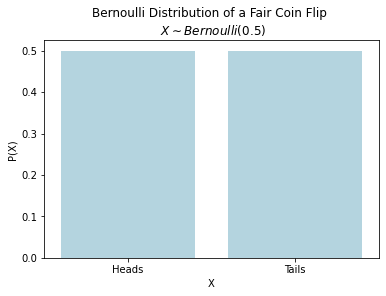

In [83]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame()
data["X"] = ["Heads", "Tails"]
data["P(X)"] = [0.5, 0.5]
axs = sns.barplot(data=data, x="X", y="P(X)", color="lightblue");
axs.set(title="Bernoulli Distribution of a Fair Coin Flip \n $X \\sim Bernoulli(0.5)$");

<hr>

### Categorical 🎲

* **Number of possible outcomes $k > 2$**
* **Number of trials $n = 1$**
* **Example**: Rolling a die, choosing a color, choosing a letter
* **Number of parameters**: $k$
* **Parameter**: Probability of each outcome $p_1, p_2, \ldots, p_k$

The categorical distribution is a generalization of the Bernoulli distribution. It models the **probability of observing a particular outcome from a set of $k > 2$ outcomes in a single trials**. 

For example, it models the **probability of observing a particular face when rolling a k-sided die once**. 

The probability mass function of the categorical distribution is:

$$
f(x) = \begin{cases}
p_1 & \text{if } x = 1 \\
p_2 & \text{if } x = 2 \\
\vdots \\
p_k & \text{if } x = k
\end{cases}
$$

where $p_1, p_2, \ldots, p_k$ are the probabilities of observing each of the $k$ outcomes. The probabilities must sum to 1.



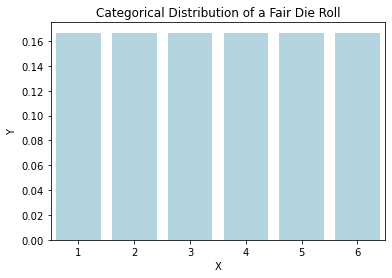

In [104]:
cat_data = pd.DataFrame()
cat_data['X'] = range(1, 7)
cat_data['Y'] = 1/6
axs = sns.barplot(data=cat_data, x="X", y="Y", color="lightblue");
axs.set(title="Categorical Distribution of a Fair Die Roll");

In [ ]:
from scipy.stats import categorical

n = 50
p = 0.5

binom_data = pd.DataFrame()
binom_data['X'] = range(51)
binom_data['Y'] = binom.pmf(binom_data['X'], n, p)

axs = sns.lineplot(data=binom_data, x=binom_data['X'], y=binom_data['Y']);
axs.set(title="Binomial Distribution of 50 Flips of a Fair Coin \n $X \\sim Binomial(n=50, p=0.5)$");

<hr>

### Binomial 🪙 🪙 🪙

* **Number of possible outcomes $k = 2$**
* **Number of trials $n > 1$**
* **Example:** <u>Count of Heads</u> in $n$ coin tosses
* **Number of parameters**: $2$
* **Parameters**: Probability of success $p$ and number of trials $n$
<!-- * **Sample Space**: $\Omega = \{0, 1, 2, \ldots, N\}$ -->

The binomial distribution is the discrete probability distribution of the **number of successes in a sequence of $n$ independent trials, each asking a yes–no question, and each with its own boolean-valued outcome: success/yes/true/one (with probability $p$)** or failure/no/false/zero (with probability $q = 1 − p$).  

For example, if we were interested in **probability of observing a head in $n$ coin tosses**, we would use the binomial distribution, where "1" is defined to mean "heads" and "0" is defined to mean "tails".

The probability function of the binomial distribution is:

$$
P(X=x) = \binom{n}{x} p^x(1-p)^{n-x}
$$

where $n$ is the number of trials and $p$ is the probability of success. The binomial coefficient $\binom{n}{x}$ is the number of ways to choose $x$ items from a set of $n$ items. The binomial coefficient is defined as:

$$
\binom{n}{x} = \frac{n!}{x!(n-x)!}
$$

where $n!$ is the factorial of $n$.



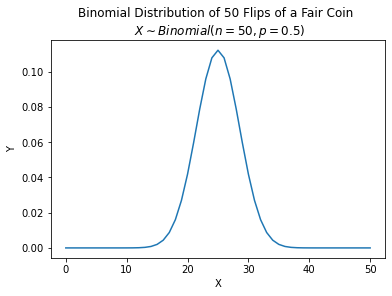

In [100]:
from scipy.stats import binom

n = 50
p = 0.5

binom_data = pd.DataFrame()
binom_data['X'] = range(51)
binom_data['Y'] = binom.pmf(binom_data['X'], n, p)

axs = sns.lineplot(data=binom_data, x=binom_data['X'], y=binom_data['Y']);
axs.set(title="Binomial Distribution of 50 Flips of a Fair Coin \n $X \\sim Binomial(n=50, p=0.5)$");

<hr/>

### Multinomial 🎲 🎲 🎲

<!-- # ⚀ = 2, # ⚁ = 1, # ⚂ = 3, # ⚃ = 0, # ⚄ = 0, # ⚅ = 0 -->

* **Number of possible outcomes $k > 2$**
* **Number of trials $n > 1$**
* **Example**:  As a result of $n=9$ rolls of a die, <br/>
                Count of 1-face ⚀ = 2 $\wedge$ <br/>
                Count of 2-face ⚁ = 1 $\wedge$ <br/>
                Count of 3-face ⚂ = 2 $\wedge$ <br/>
                Count of 4-face ⚃ = 1 $\wedge$ <br/>
                Count of 5-face ⚄ = 2 $\wedge$ <br/>
                Count of 6-face ⚅ = 1
* **Number of parameters**: $k + 2$
* **Parameters**: $n$, $k$ and probability of each outcome $p_1, p_2, \ldots, p_k$ such that $\sum_{i=1}^k p_i = 1$
<!-- * **Sample Space**: $\Omega = \{0, 1, 2, \ldots, N\}$ -->

Multinomial distribution is a multivariate generalization of the binomial distribution. It models the **probability of observing a particular count for each of $k > 2$ outcomes in $n > 1$ trials**.

For example, it models the **probability of counts for rolling a k-sided die n times**. 

The probability function of the multinomial distribution is:

$$
P(X=\{x_1, x_2, \ldots x_k \}) = \frac{n!}{x_1!x_2!\ldots x_k!} p_1^{x_1}p_2^{x_2}\ldots p_k^{x_k}
$$

where $n$ is the number of trials, $k$ is the number of outcomes, $n_1, n_2, \ldots, n_k$ are the counts for each outcome, and $p_1, p_2, \ldots, p_k$ are the probabilities of each outcome. The probabilities must sum to 1 and the counts must sum to $n$ i.e. $\sum_{i=1}^k p_i = 1$ and $\sum_{i=1}^k x_i = n$.

For instance, using Multinomial distribution, as a result of rolling a die 9 times, we can calculate the probability of observing each even-sided face 2 times and each odd-sided face 1 times as follows :

$$P(\#⚀ = 1, \#⚁ = 2, \#⚂ = 1, \#⚃ = 2, \#⚄ = 1, \#⚅ = 2) = \frac{9!}{1!2!1!2!1!2!} \left(\frac{1}{6}\right)^9$$

$$ = \frac{362880}{8} \times \left(\frac{1}{6}\right)^9$$

$$ = 0.0045 $$

Visualizing the probability distribution of the Multinomial distribution is hard. The following figure shows the probability distribution of the Multinomial distribution for $n=5$, $k=3$, $p_1=0.5$, $p_2=0.3$ and $p_3=0.2$.

<img align="center" width="80%" src="https://miro.medium.com/v2/resize:fit:1400/1*yuiduGxcrHKlLwl4y6TiDA.png">



<hr/>

### Summary

The following table presents a summary and comparison of the categorical statistical distributions: 

| Distribution | Number of Trials $n$ | Number of Outomes $k$ | Number of parameters | Parameters | Example | 
| :--------: | :-------: | :-------: | :-------: | :-------: | :-------: |
| Bernoulli | $1$ | $2$ | $1$ | $p$ | A single coin toss |
| Categorical | $1$ | $>2$ | $k$ | $p_1, p_2, \ldots, p_k$ | A single roll of a die |
| Binomial | $>1$ | $2$ | $2$ | $n, p$ | <u>Count of heads</u> in $n$ coin tosses |
| Multinomial | $>1$ | $>2$ | $k+2$ | $n, k, p_1, p_2, \ldots, p_k$ | <u>Count of each face</u> in $n$ rolls of a die |

## Maximum Likelihood Estimation

Maximum likelihood estimation (MLE) is a method of estimating the parameters of a probability distribution by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate.

Likelihood function is the probability of observing the data given the parameters.

Maximum likelihood estimate of Bernoulli distribution's only parameter $p$, given data, is:

$$ \hat{p} = \frac{\text{Number of successes}}{\text{Number of observations}} $$

Similarly, Maximum likelihood estimate of $k$ parameters of Categorical distribution is:

$$
\begin{aligned}
\hat{p}_i &= \frac{\text{Number of observations of outcome i}}{\text{Number of observations}} \\
\\
\hat{n} &= \text{Number of observations}
\end{aligned}
$$



Note that the maximum likelihood estimate of the parameters of the Binomial and Multinomial distributions are not as simple as the Bernoulli and Categorical distributions and require multiple samples. However, since there is a Bernoulli distribution for each trial of the Binomial distribution and a Categorical distribution for each trial of the Multinomial distribution, we can use the maximum likelihood estimates of the Bernoulli and Categorical distributions to estimate the parameters of the Binomial and Multinomial distributions.

## Law of Large Numbers

The law of large numbers states that as the number of trials of a random experiment increases, the average of the observed outcomes approaches the expected value.

For example, if we toss a fair coin 10 times, we might expect to observe 5 heads but may or may not get 5. However,  if we toss a fair coin 1,000,000 times, we can confidently expect to observe nearabouts 500,000 heads, if the coin is indeed fair.

The law of large numbers is the basis for the frequentist approach to statistics. The frequentist approach to statistics is based on the idea that the probability of an event is the long-run relative frequency of the event. In other words, the probability of an event is the proportion of times the event occurs in a large number of trials.

In the context of MLE, the law of large numbers implies that as the number of observations increases, the maximum likelihood estimate of the parameters approaches the true parameters of the distribution.




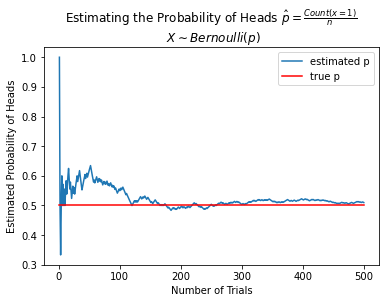

In [150]:
from numpy.random import choice 

n = 500

data = pd.DataFrame()
data['X'] = choice([0, 1], size=n)
data['trials'] = range(1, n+1)
data['p_hat'] = data['X'].cumsum() / data['trials']
sns.lineplot(data=data, x='trials', y='p_hat', label='estimated p');
axs = sns.lineplot(data=data, x='trials', y=0.5, color='red', label='true p');

axs.set(title="Estimating the Probability of Heads $\\hat{p} = \\frac{Count(x=1)}{n}$ \n " + \
              "$X \\sim Bernoulli(p)$ \n Note ", xlabel='Number of Trials', ylabel='Estimated Probability of Heads');


## Central Dogma of Statistics

The central dogma of data science, simply put, is that general claims about a population can be made from a sample of data. 

<img width="80%" align="center" src="https://fahadsultan.com/datascience_ml/_images/dogma.png">

This raises concerns about the sampling process such as the representativeness of the sample, the size of the sample, the sampling bias, etc. Which in turn raises concerns about potential negative effects of the claims made based on questionable data.

<hr/>

<img width="45%" align="right" src="https://pbs.twimg.com/media/Dv3SAKYU0AAgbJ3?format=jpg&name=large">

Issues with sampling and underrepresentative data are not new. In 1936, the **Literary Digest** magazine conducted a poll to predict the outcome of the presidential election. The poll was based on a **sample of 2.4 million people**. The poll predicted that Alf Landon would win the election with 57% of the vote. However, the actual election results were the opposite. Franklin D. Roosevelt won the election with 62% of the vote.

The reason for the failure of the poll was that the sample was not representative of the population. The sample was biased towards the wealthy and the educated. The poll was also conducted by sending out postcards to people who subscribed to the Literary Digest magazine. In 1936, only the wealthy and the educated subscribed to magazines. 

The Literary Digest magazine went bankrupt soon after the election. George Gallup, who correctly predicted the outcome of the election, went on to found the American Institute of Public Opinion, which later became the Gallup Poll.

The big takeaway from this story is that **size alone is not enough**. In other words, **large sample sizes is a necessary but not sufficient condition** for making general claims about a population. 